# Samurai by the numbers (lvl 50)
## by Tzuyu Chou (Cactuar)

## Update log
### 06/01/2017: Three openers and priority

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

## lvl 50 rotation

### Level 50 unlocks the final weaponskill, Yukikaze, a combo finisher to open the final Sen, Setsu. It combos from Hakaze so it is a two hit combo contrary to Gekko and Kasha. Level 50 also confers the Meikyo Shisui ability, a cooldown that allows you to execute up to 3 combo abilities without meeting combo prerequisites. This may be used, for example, to quickly get Jinpu and Shifu buffs up or to open up all three Sen in a fraction of the time as normal.

### Furthermore, the opening of the final Sen unlocks the final Iaijutsu, Midare Setsugekka. This powerful single target nuke gives the opportunity in single target situations to deal massive damage without having to clip Higanbana.

### Let's explore opener options.

In [2]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Yukikaze', sam.yukikaze()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.shifu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Midare Setsugekka\n+ Meikyo Shisui', sam.midare_setsugekka()+sam.meikyo_shisui()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Yukikaze', sam.yukikaze()+sam.higanbana_dot()),]
sam.has_meikyo_shisui = False
actions.append(('Midare Setsugekka', sam.midare_setsugekka()+sam.higanbana_dot()))

In [3]:
df0_0 = pd.DataFrame(actions, columns=['action', 'potency'])
df0_0['total potency'] = df0_0['potency'].cumsum(axis=0)
display(df0_0)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Higanbana,266.400000,1140.400000
4,Hakaze,214.227273,1354.627273
5,Jinpu,365.686364,1720.313636
6,Gekko,565.486364,2285.800000
7,Hakaze,246.361364,2532.161364
8,Yukikaze,488.896364,3021.057727
9,Hakaze,267.423614,3288.481341


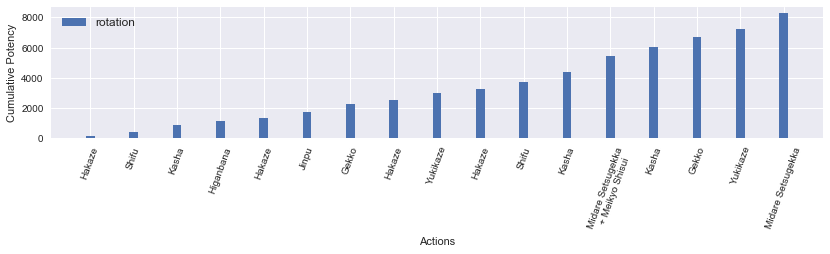

In [4]:
plot_potency(df0_0)

### This opener gets the buffs Shifu > Jinpu > Yukikaze up first. Higanbana is applied ASAP. Meikyo Shisui is used after Midare Setsugekka to immediately prepare another Midare Setsugekka.

In [5]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha\n+ Meikyo Shisui', sam.kasha()+sam.meikyo_shisui()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Yukikaze', sam.yukikaze()),]
sam.has_meikyo_shisui = False
actions +=[('Midare Setsugekka', sam.midare_setsugekka()),
           ('Hakaze', sam.hakaze()),
           ('Yukikaze', sam.yukikaze()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.shifu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),]

In [6]:
df0_1 = pd.DataFrame(actions, columns=['action', 'potency'])
df0_1['total potency'] = df0_1['potency'].cumsum(axis=0)
display(df0_1)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha\n+ Meikyo Shisui,444.000000,874.000000
3,Jinpu,310.800000,1184.800000
4,Gekko,510.600000,1695.400000
5,Yukikaze,434.010000,2129.410000
6,Midare Setsugekka,1020.178800,3149.588800
7,Hakaze,212.537250,3362.126050
8,Yukikaze,481.751100,3843.877150
9,Higanbana,340.059600,4183.936750


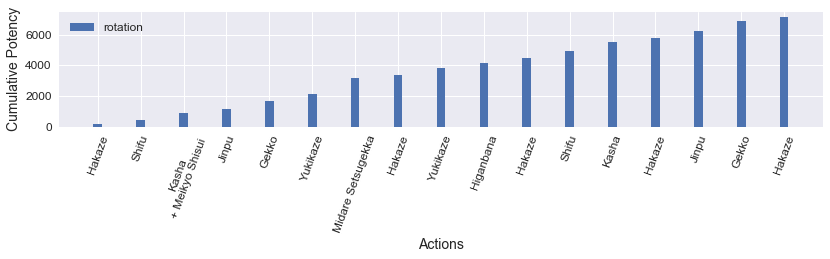

In [7]:
plot_potency(df0_1)

### This opener leverages Meikyo Shisui to get the buffs Shifu > Jinpu > Yukikaze up ASAP. The first Iaijutsu is for Midare Setsugekka; Higanbana is applied next. The second Midare Setsugekka is not used until 3 more GCDs.

In [8]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Hakaze', sam.hakaze()),
           ('Yukikaze', sam.yukikaze()),
           ('Midare Setsugekka', sam.midare_setsugekka()),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Higanbana\n+ Meikyo Shisui', sam.higanbana()+sam.meikyo_shisui()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Yukikaze', sam.yukikaze()+sam.higanbana_dot()),]
sam.has_meikyo_shisui = False
actions +=[('Midare Setsugekka', sam.midare_setsugekka()+sam.higanbana_dot()),]

In [9]:
df0_2 = pd.DataFrame(actions, columns=['action', 'potency'])
df0_2['total potency'] = df0_2['potency'].cumsum(axis=0)
display(df0_2)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Hakaze,166.500000,1040.500000
4,Jinpu,310.800000,1351.300000
5,Gekko,510.600000,1861.900000
6,Hakaze,191.475000,2053.375000
7,Yukikaze,434.010000,2487.385000
8,Midare Setsugekka,1020.178800,3507.563800
9,Hakaze,212.537250,3720.101050


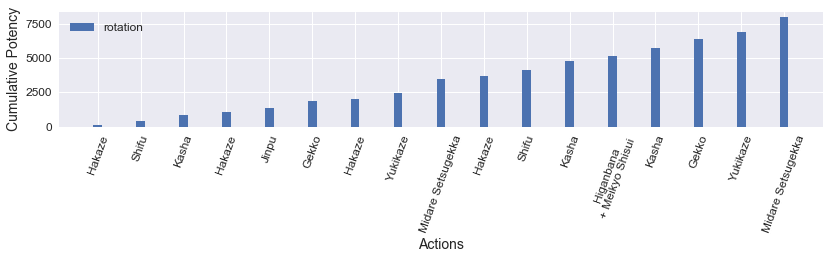

In [10]:
plot_potency(df0_2)

### This opener is similar to the first one but switches Higanbana and the first Midare Setsugekka. Buffs are applied first Shifu > Jinpu > Yukikaze.

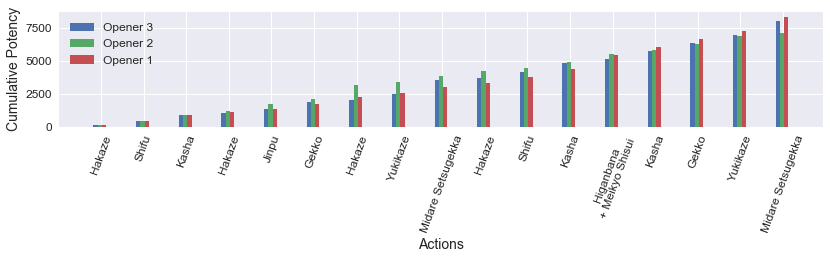

In [11]:
dfs = [df0_2, df0_1, df0_0]
labels = ['Opener 3', 'Opener 2', 'Opener 1']
compare_n_potencies(dfs, labels)

### These openers have fairly similar cumulative potencies over the selected time horizon. At level 50, you have no other offensive cooldowns when considering buff alignment. Party synergies will need to be considered to determine the best placement. (Maximizing potency delivered under party buffs.) Higanbana is applied at a different time and each opener bursts at different times. Since Higanbana and Midare Setsugekka have the highest effective potency per GCD (with DoT snapshot), getting those Iaijutsu under party buffs will differentiate these openers' potency significantly.

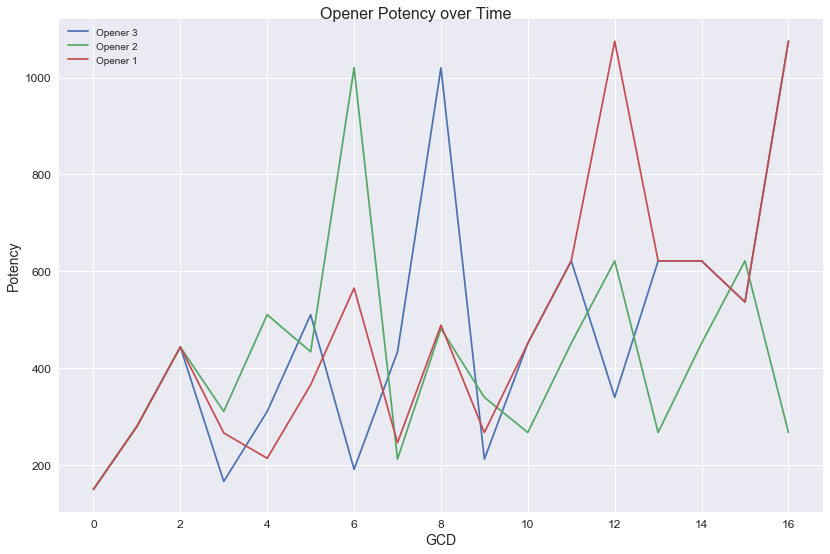

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

for k, df in enumerate(dfs):
    ax.plot(df['potency'], label=labels[k])
    ax.set_xlabel('GCD')
    ax.set_ylabel('Potency')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})

fig.suptitle('Opener Potency over Time')
fig.tight_layout(pad=2)

### Priority: Shifu > Jinpu > Yukikaze and Higanbana > Midare Setsugekka
### Since Yukikaze is applied to the target, refreshing it on a dying target is lesser of a priority.
### However, since it is necessary to open Setsu, it cannot be neglected.

### Filler: Combos to refresh buffs, avoid wasting Sen.

### AoE: Similar as lvl 40-49... avoid using Yukikaze in large pulls due to it being a target debuff, not a self buff.
### You will probably be using the AoE weaponskills -> Tenka Goken rotation anyway.